## Fetching Dataset

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784')

c:\Users\FCI1400\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
x, y = mnist['data'], mnist['target']

In [4]:
x.iloc[36000].shape

(784,)

In [5]:
y.shape

(70000,)

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [7]:
some_digit = np.array(x.iloc[36001])
some_digit_image = some_digit.reshape(28, 28)   # Lets reshape it to plot it

(-0.5, 27.5, 27.5, -0.5)

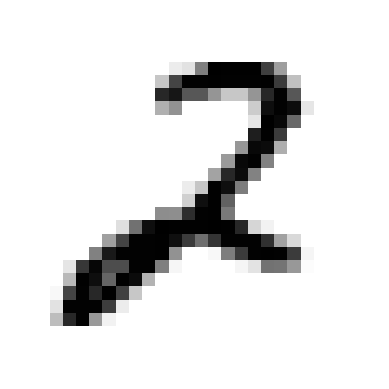

In [8]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")

In [9]:
y[36001]

'2'

In [10]:
shuffle_index = np.random.permutation(70000)
x_train, x_test = x.iloc[shuffle_index[:60000]], x.iloc[shuffle_index[60000:]]
y_train, y_test = y[shuffle_index[:60000]], y[shuffle_index[60000:]]

## Creating a 2 detector

In [11]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==2)
y_test_2 = (y_test==2)

In [12]:
y_test_2

12216    False
59811    False
25912     True
43058    False
29002    False
         ...  
38615    False
4691     False
38134    False
508      False
48495    False
Name: class, Length: 10000, dtype: bool

In [13]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(tol=0.1)
clf.fit(x_train, y_train_2)

c:\Users\FCI1400\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [14]:
clf.predict([some_digit])

c:\Users\FCI1400\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([ True])

In [15]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")

c:\Users\FCI1400\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\FCI1400\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

In [16]:
a.mean()

0.9781333333333334

In [17]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, x_train, y_train_2, cv=3)

c:\Users\FCI1400\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\FCI1400\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

In [18]:
y_train_pred

array([False, False, False, ..., False, False, False])

## Calculating confusion matrix

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_2, y_train_pred)

array([[53514,   496],
       [  816,  5174]], dtype=int64)

In [25]:
confusion_matrix(y_train_2, y_train_2)

array([[54010,     0],
       [    0,  5990]], dtype=int64)

## Precision and Recall

In [26]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_2, y_train_pred)

0.9125220458553792

In [28]:
recall_score(y_train_2, y_train_pred)

0.8637729549248748

## F1-Score

In [34]:
from sklearn.metrics import f1_score
f1_score(y_train_2, y_train_pred)

0.8874785591766724

In [35]:
y_scores = cross_val_predict(clf, x_train, y_train_2, cv=3, method="decision_function")  # Thresolds

c:\Users\FCI1400\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\FCI1400\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

In [36]:
y_scores

array([ -5.05177088,  -9.1304469 , -12.90508034, ...,  -3.85192919,
        -5.24628259,  -7.26635281])

## Precision Recall curve

In [39]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresolds = precision_recall_curve(y_train_2, y_scores)

In [40]:
precisions

array([0.09983333, 0.099835  , 0.09983666, ..., 1.        , 1.        ,
       1.        ])

In [41]:
recalls

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       3.33889816e-04, 1.66944908e-04, 0.00000000e+00])

In [42]:
thresolds

array([-46.81348833, -44.92569125, -43.52637668, ...,  18.03452743,
        18.14078579,  18.44364448])

## Plotting the precision recall curve

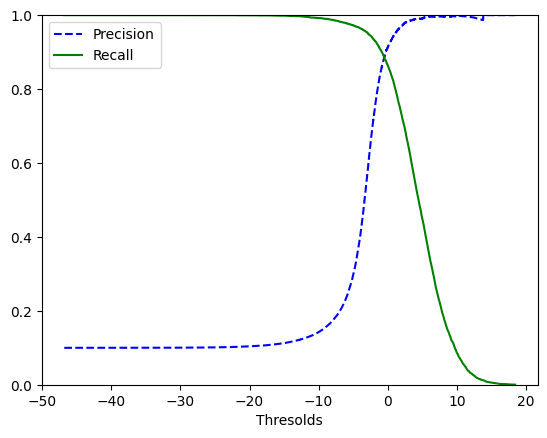

In [45]:
plt.plot(thresolds, precisions[:-1], "b--", label="Precision")
plt.plot(thresolds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Thresolds")
plt.legend(loc="upper left")
plt.ylim([0, 1])
plt.show()